# Sourcing & Analyzing Time Series Data

# Importing Libraries

In [8]:
!pip install quandl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 1.5 MB/s eta 0:00:00


In [9]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings


warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [10]:
# Configure API key 

quandl.ApiConfig.api_key = 'tBv79J88zsH3yDi8afBc'

# Import Dataframe 

In [11]:
# Importing the Federal Reserve Economic Data "Real Potential Gross Domestic Product" variable.

data = quandl.get('FRED/GDPPOT')

In [12]:
data.head(5)

,Value
Date,
1949-01-01,2102.982630
1949-04-01,2130.581305
1949-07-01,2159.340530
1949-10-01,2186.844859
1950-01-01,2216.058359


In [13]:
data.shape

(332, 1)

In [14]:
data.columns

Index(['Value'], dtype='object')

In [15]:
type(data)

pandas.core.frame.DataFrame

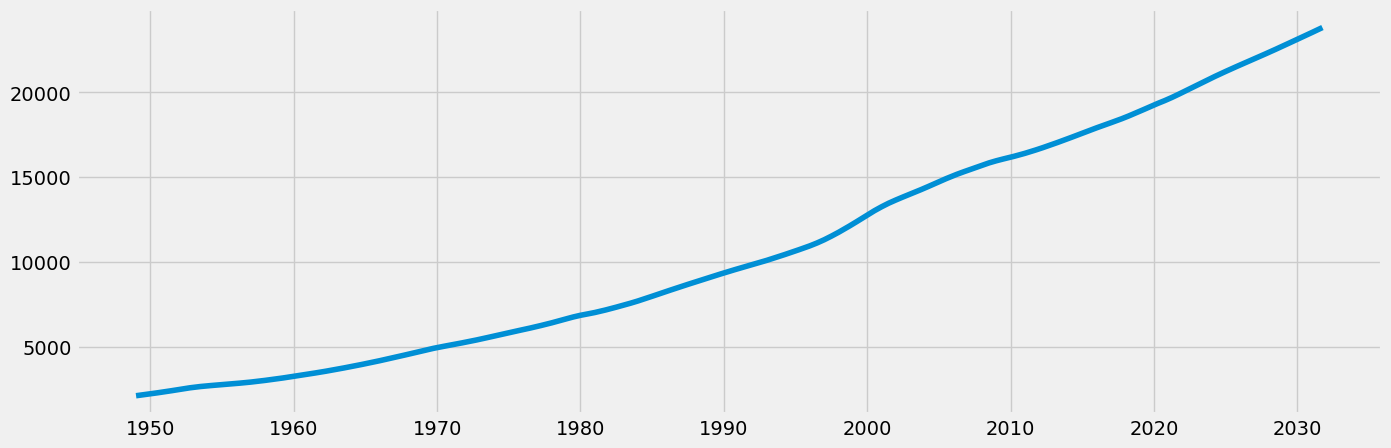

In [16]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100)
# The dpi argument controls the quality of the visualization here. When it's set to 100, it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(data)

# Subsetting, wrangling, and cleaning time-series data

In [17]:
# Reset index so that you can use the "Date" column as a filter

data_2 = data.reset_index()

In [18]:
data_2.head()

,Date,Value
0,1949-01-01,2102.982630
1,1949-04-01,2130.581305
2,1949-07-01,2159.340530
3,1949-10-01,2186.844859
4,1950-01-01,2216.058359


In [19]:
data_sub = data_2.loc[(data_2['Date'] < '2022-02-01')]

In [20]:
data_sub.shape

(293, 2)

In [21]:
data_sub.head()

,Date,Value
0,1949-01-01,2102.982630
1,1949-04-01,2130.581305
2,1949-07-01,2159.340530
3,1949-10-01,2186.844859
4,1950-01-01,2216.058359


In [22]:
# Set the "Date" column as the index

from datetime import datetime

data_sub['datetime'] = pd.to_datetime(data_sub['Date']) # Create a datetime column from 'Date'.
data_sub = data_sub.set_index('datetime') # Set the datetime as the index of the dataframe.
data_sub.drop(['Date'], axis=1, inplace=True) # Drop the "Date" column.
data_sub.head()

,Value
datetime,
1949-01-01,2102.982630
1949-04-01,2130.581305
1949-07-01,2159.340530
1949-10-01,2186.844859
1950-01-01,2216.058359


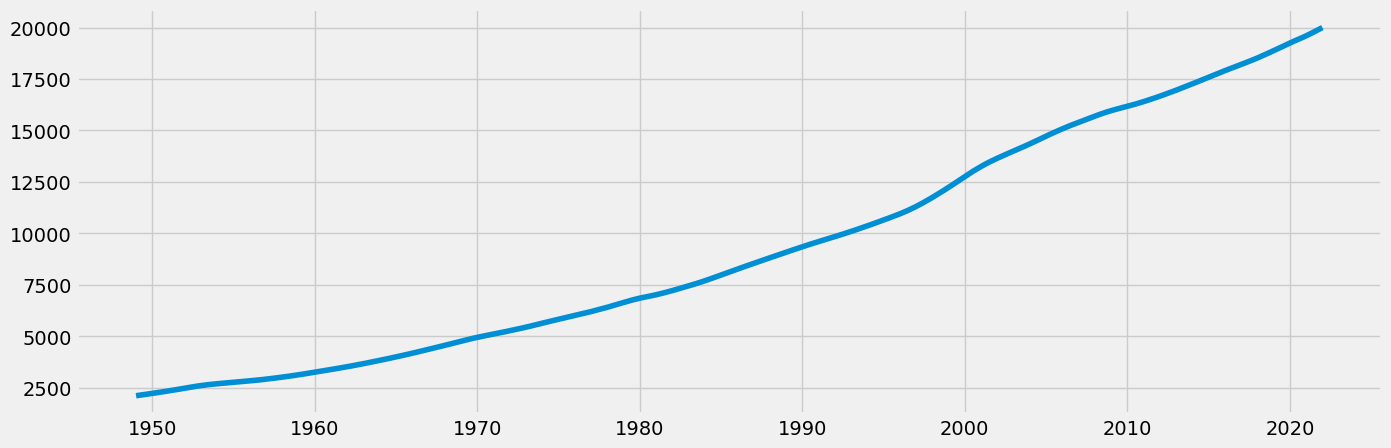

In [23]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_sub)

In [24]:
# Check for missing values (you shouldn't have any)

data_sub.isnull().sum() 

Value    0
dtype: int64

In [25]:
# Check for duplicates

dups = data_sub.duplicated()
dups.sum()

# No dups!

0

In [ ]:
# Line Chart interpretation: From the year 1950 to 2022 we see a steady inline in Real Potential Gross Domestic Product

In [ ]:
# Time-series analysis: decomposition

In [26]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(data_sub, model='additive')

In [27]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

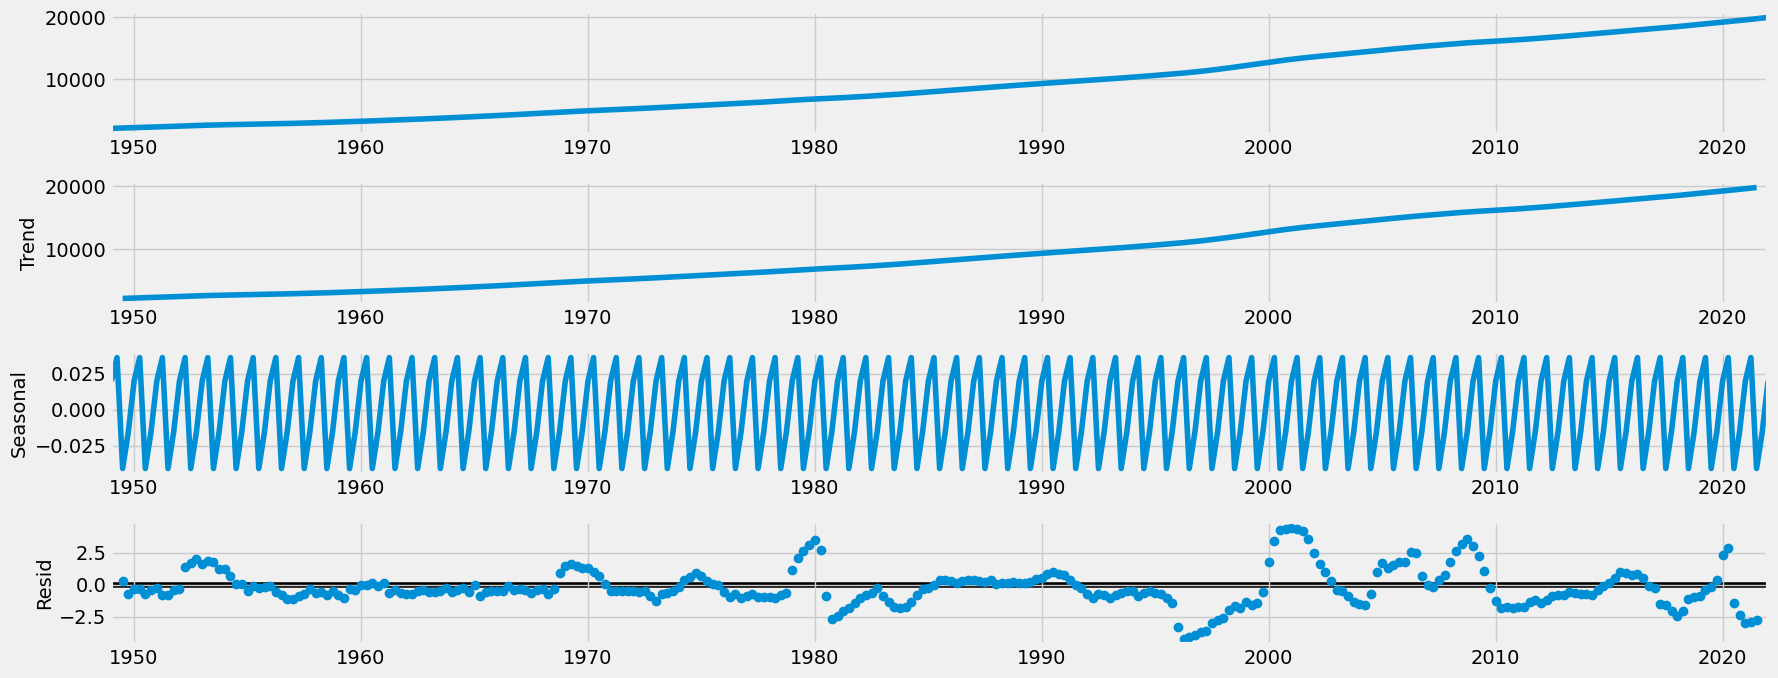

In [28]:
# Plot the separate components

decomposition.plot()
plt.show()

# Testing for stationarity

In [29]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data_sub['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                   2.431518
p-value                          0.999024
Number of Lags Used              4.000000
Number of Observations Used    288.000000
Critical Value (1%)             -3.453262
Critical Value (5%)             -2.871628
Critical Value (10%)            -2.572146
dtype: float64


In [ ]:
# p-value (0.999024) is larger than 0.05
# Test Statistic (0.999024) is larger than Critical Values.
# That means there is a unit root in the data and this data is non-stationary.

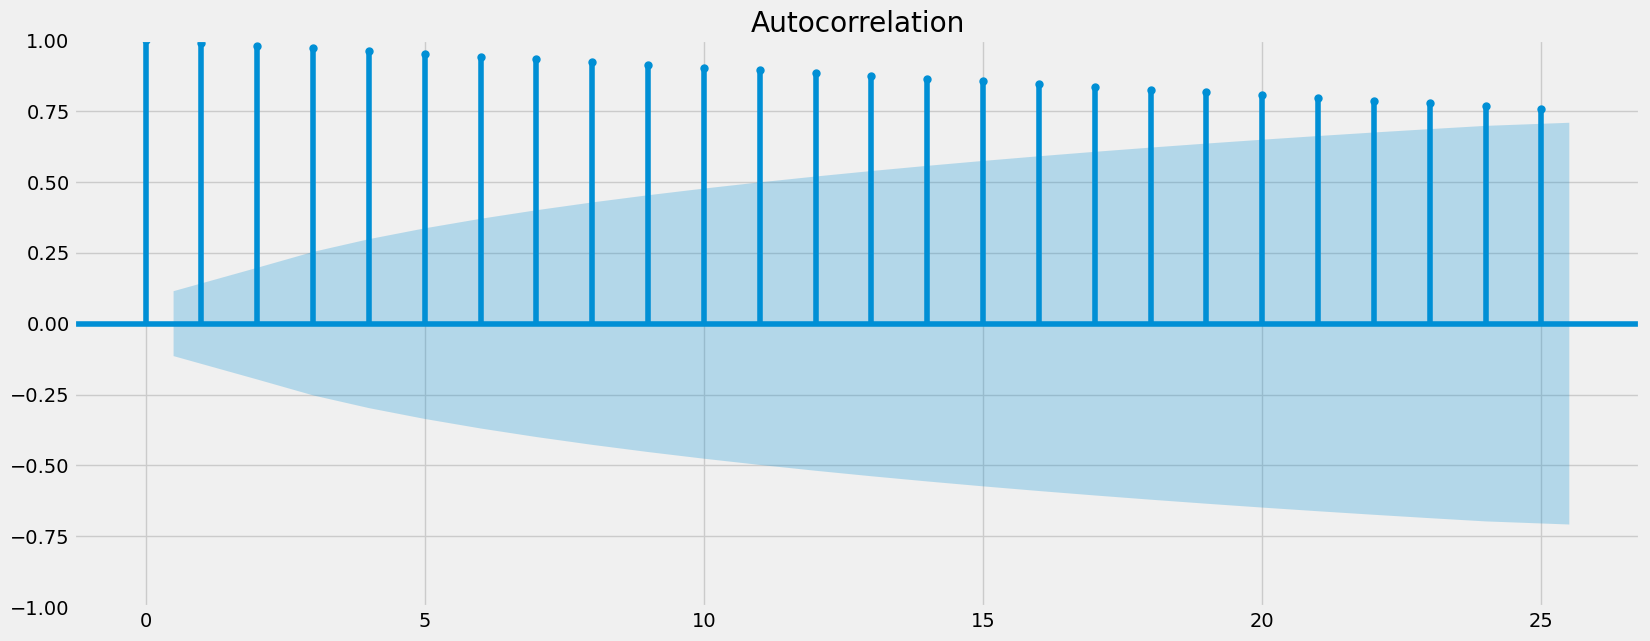

In [30]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(data_sub)
plt.show()

In [ ]:
# There is no significant lag, meaning data is non-stationary.

# Stationarizing Data

In [31]:
data_diff = data_sub - data_sub.shift(1) 
# The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [32]:
data_diff.dropna(inplace = True) 
# Here, you remove the missing values that came about as a result of the differencing. You need to remove these or you won't be able to run the Dickey-Fuller test.

In [33]:
data_diff.head()

,Value
datetime,
1949-04-01,27.598675
1949-07-01,28.759225
1949-10-01,27.504329
1950-01-01,29.213500
1950-04-01,29.423311


In [34]:
data_diff.columns

Index(['Value'], dtype='object')

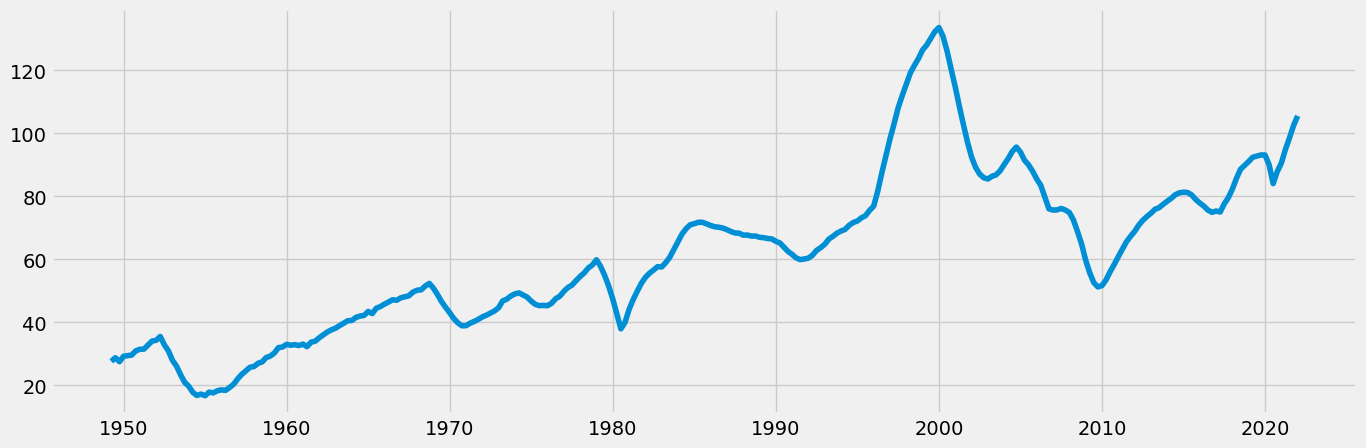

In [35]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [36]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                  -1.268043
p-value                          0.643663
Number of Lags Used              5.000000
Number of Observations Used    286.000000
Critical Value (1%)             -3.453423
Critical Value (5%)             -2.871699
Critical Value (10%)            -2.572183
dtype: float64


In [ ]:
# p-value (0.643663) is larger than 0.05, but Test Statistic (-1.268043) is now smaller than Critical Values. Meaning, non-stationary data but very weakly.

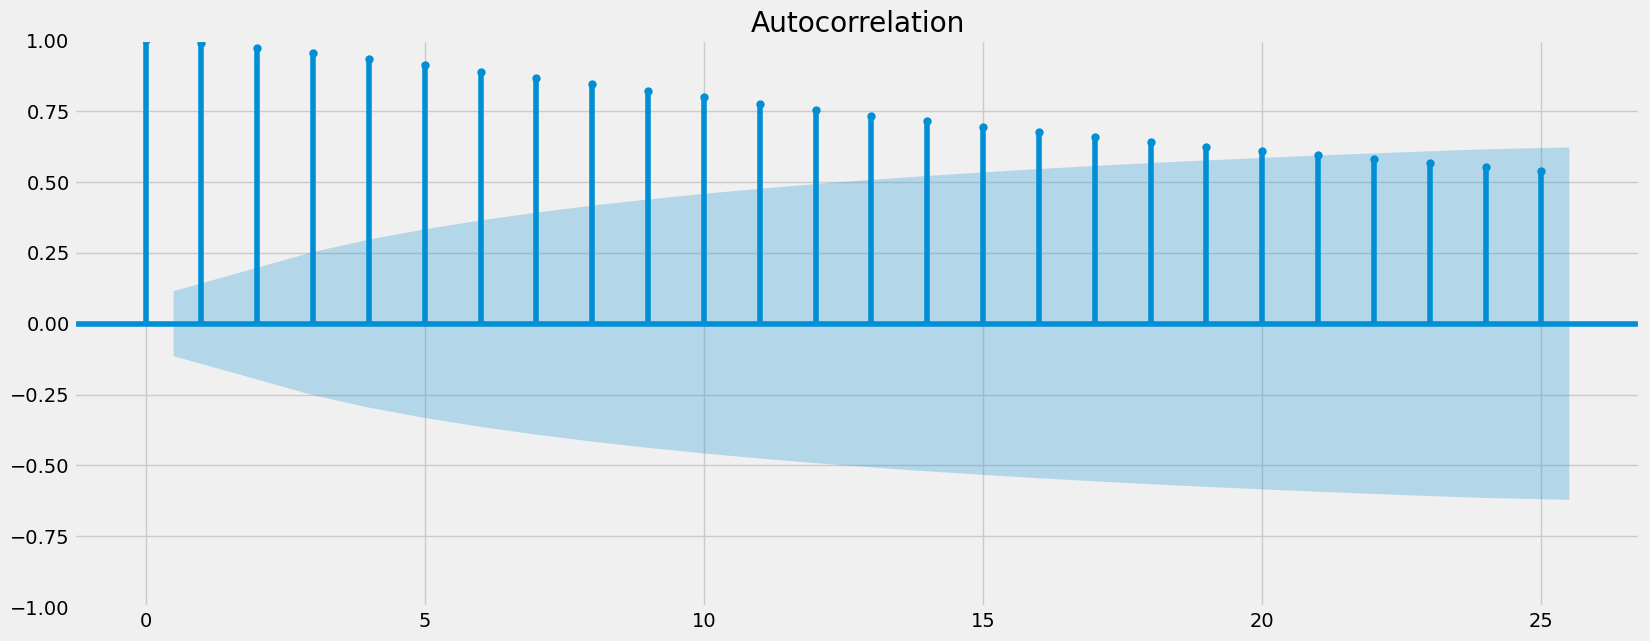

In [37]:
plot_acf(data_diff)
plt.show()

In [ ]:
# Only 4 significant lags!

In [38]:
# Apply the log transformation
data_diff1 = np.log(data_diff)

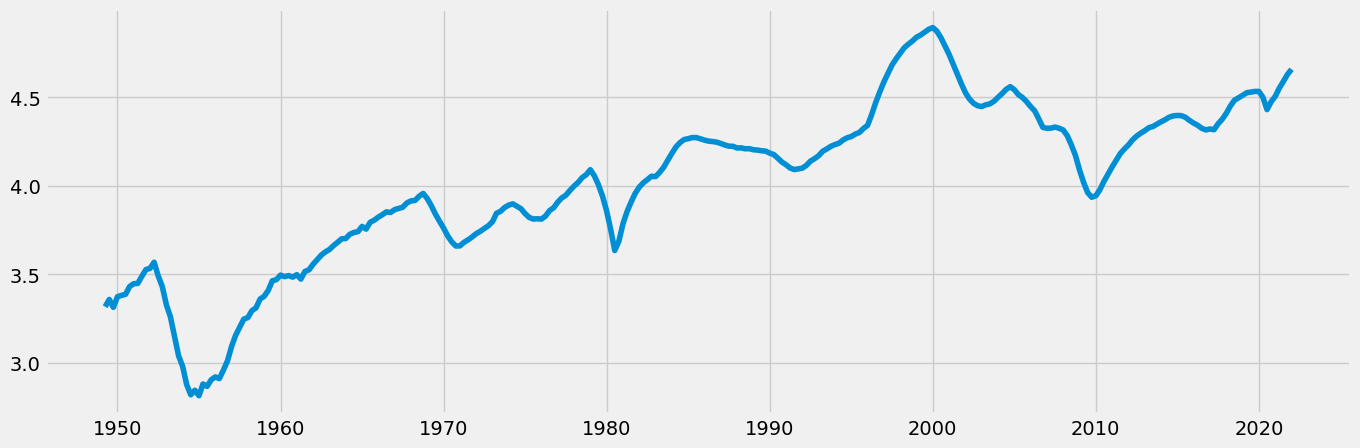

In [39]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff1)

In [40]:
dickey_fuller(data_diff1)

Dickey-Fuller Stationarity test:
Test Statistic                  -1.321156
p-value                          0.619439
Number of Lags Used              4.000000
Number of Observations Used    287.000000
Critical Value (1%)             -3.453342
Critical Value (5%)             -2.871664
Critical Value (10%)            -2.572164
dtype: float64


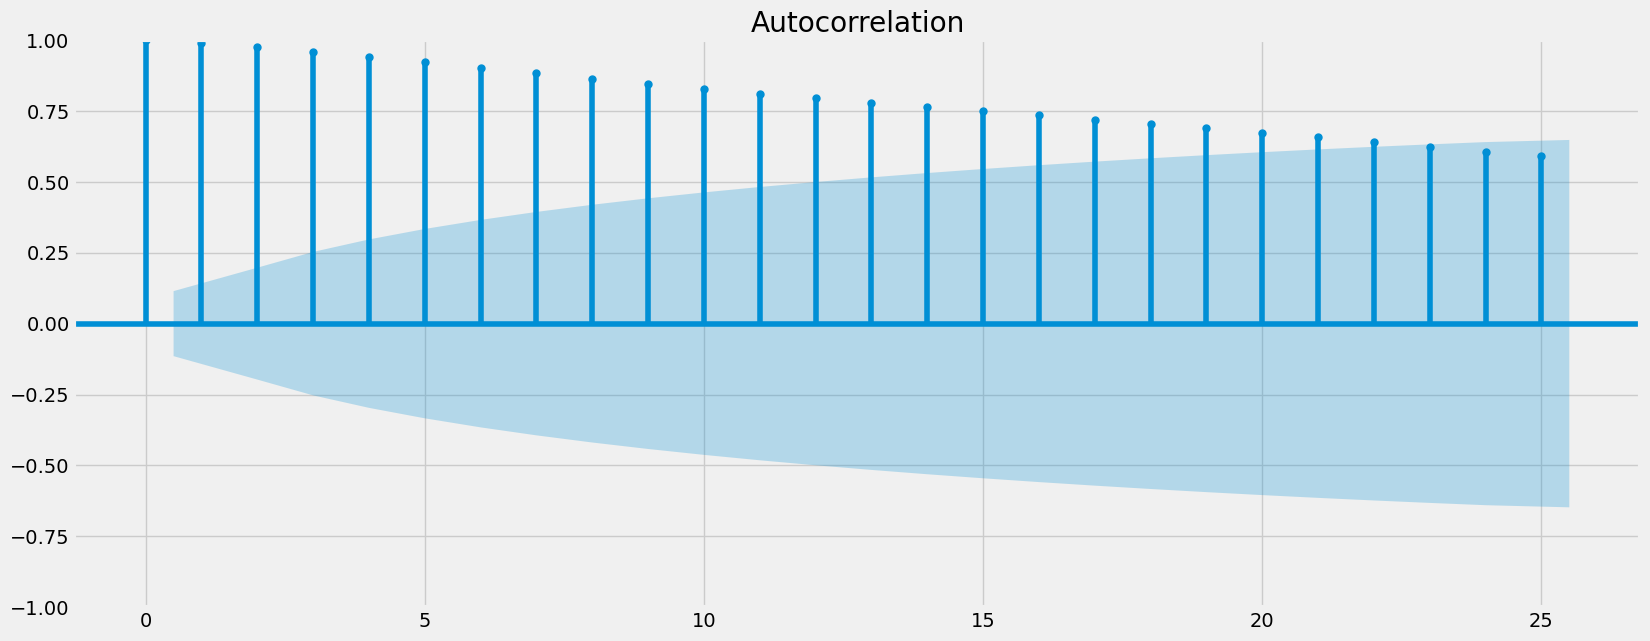

In [41]:
plot_acf(data_diff1)
plt.show()

In [42]:
data_diff2 = data_diff1 - data_diff1.shift(1) 
# The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)


In [43]:
data_diff2.dropna(inplace = True) 
# Here, you remove the missing values that came about as a result of the differencing. You need to remove these or you won't be able to run the Dickey-Fuller test.


In [44]:
data_diff2.head()


,Value
datetime,
1949-07-01,0.041191
1949-10-01,-0.044615
1950-01-01,0.060288
1950-04-01,0.007156
1950-07-01,0.006008


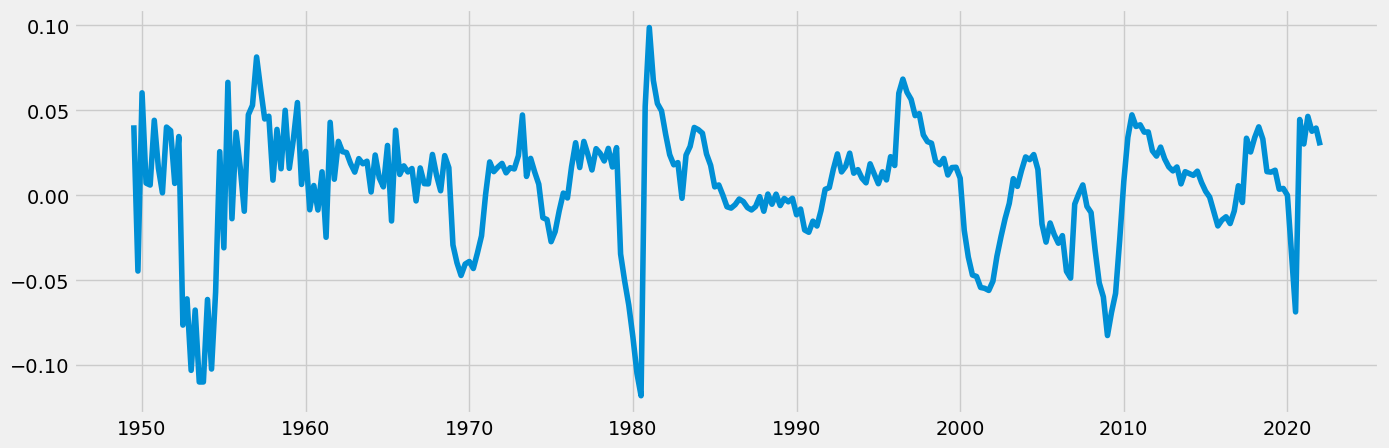

In [45]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff2)

In [46]:
dickey_fuller(data_diff2)


Dickey-Fuller Stationarity test:
Test Statistic                -6.638825e+00
p-value                        5.475302e-09
Number of Lags Used            3.000000e+00
Number of Observations Used    2.870000e+02
Critical Value (1%)           -3.453342e+00
Critical Value (5%)           -2.871664e+00
Critical Value (10%)          -2.572164e+00
dtype: float64


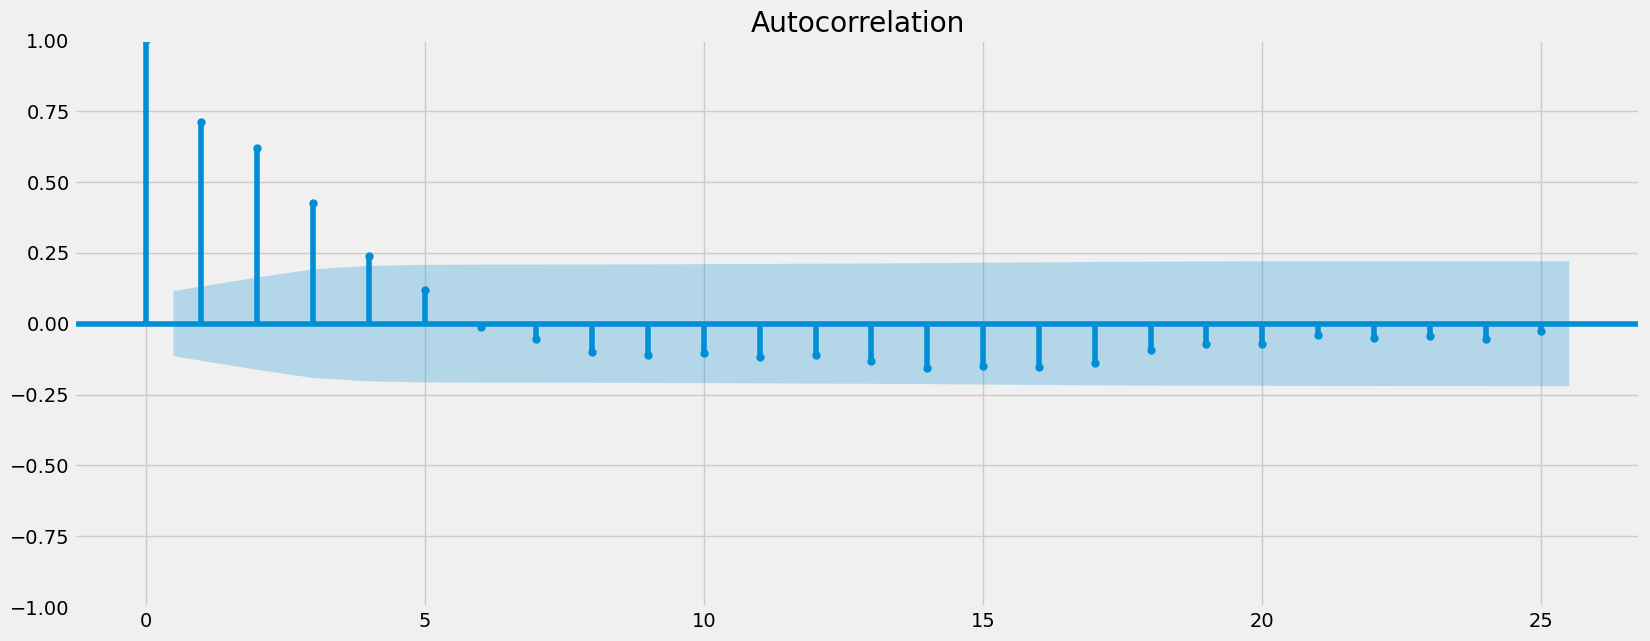

In [47]:
plot_acf(data_diff2)
plt.show()